In [1]:
import os, sys

spark_home = "/usr/local/Cellar/apache-spark/1.5.2/libexec"
os.environ['SPARK_HOME'] = spark_home
longpath = "/usr/local/Cellar/apache-spark/1.5.2/libexec/python:/usr/local/Cellar/apache-spark/1.5.2/libexec/python/lib/py4j-0.8.2.1-src.zip"
for item in longpath.split(":"):
    if item not in sys.path:
        sys.path.insert(1,item)

print sys.path

# If PySpark isn't specified, use currently running Python binary:
pyspark_python = sys.executable
os.environ['PYSPARK_PYTHON'] = pyspark_python

['', '/usr/local/Cellar/apache-spark/1.5.2/libexec/python/lib/py4j-0.8.2.1-src.zip', '/usr/local/Cellar/apache-spark/1.5.2/libexec/python', '/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/System/Library/Frameworks/Python.framework/Versions/

In [2]:
%%javascript
require.config({
paths: {
d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
}
});

<IPython.core.display.Javascript object>

In [7]:
# configure_spark()
from pyspark import SparkContext
from pyspark import SparkConf
sc = SparkContext(master="spark://mini.local:7077")
data = sc.textFile("/storage/reddit/")

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data.count()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=spark://mini.local:7077) created by __init__ at <ipython-input-2-480f74364065>:4 

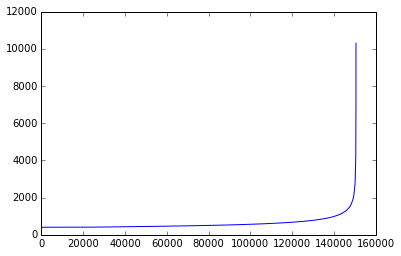

In [6]:
data = sc.textFile("/storage/reddit/RC_2007-10.bz2")
lengths = data.map(lambda line: len(line)).collect()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.plot(sorted(lengths))

In [5]:
import re, json
data = sc.textFile("/Users/mscs/Desktop/reddit/")
gex = re.compile('\[.*?\]\((?:http|https)://(.*?)/*\\)')
urls = data.map(lambda post: json.loads(post)).map(lambda post: post['body']). \
    filter(lambda body: gex.findall(body)). \
    flatMap(lambda body: gex.findall(body)). \
    map(lambda url: url.split("/")[0])

# Break up URLS into components: e.g. www.reddit.com -> ['www','reddit','com']
urls_parts = urls.map(lambda url: url.split("."))
plt.plot(sorted(urls_parts.map(lambda parts: len(parts)).filter(lambda lengths: lengths == 1).take(100)))
print urls_parts.filter(lambda parts: len(parts) == 1).collect()

Py4JJavaError: An error occurred while calling o39.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/Users/mscs/Desktop/reddit
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:285)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:228)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:313)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:207)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:35)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:239)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:237)
	at scala.Option.getOrElse(Option.scala:120)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:237)
	at org.apache.spark.api.java.JavaRDDLike$class.partitions(JavaRDDLike.scala:65)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:47)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:497)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)
